# *Credit EDA Case Study*

In this notebook, we will be analyzing applications_data.csv which contains the information/data about current/new applications.

## 1. Basic Approach

1. Importing libraries
2. Reading Files
3. Data Cleaning for previous_application data
4. Data Analysis (Univariate/Bivariate/Multivariate analysis)
5. Summary/Conclusion

## 2. Initial Steps - Importing Libraries

In [1]:
#Importing important Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import library to ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

#To view whole data clearly
pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',400)

## 3. Reading dataset (csv file)

In [2]:
df_application = pd.read_csv('application_data.csv')
df_previous = pd.read_csv('previous_application.csv')

In [3]:
#head of application data
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1 Analysing shape and information about datasets

In [5]:
#Printing shape of each dataframe
print(df_application.shape)
print(df_previous.shape)

(307511, 122)
(1670214, 37)


**This tells us that:** <br>
>For application dataset -> we have 307511 rows and 122 columns.(1 target variable)<br>
>For previous dataset -> we have 1670214 rows and 37 columns

In [6]:
#Finding information of each column in application dataset
df_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

**Application dataset contains:** <br>
>float64 type - 65 columns<br>
>int64 type - 41 columns<br>
>object type - 16 columns

In [7]:
#Finding information of each column in previous dataset.
df_previous.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Previous Application dataset contains:** <br>
>float64 type - 15 columns<br>
>int64 type - 6 columns<br>
>object type - 16 columns

### 3.2 Describing numerical columns in both datasets

#### 3.2.1 Describing application dataset

In [8]:
#describe() to get the description of numerical variables in this data.
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
#Numerical columns
app_numerical_cols = np.array(df_application.describe().columns)
app_numerical_cols

array(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPAR

In [10]:
#Non-numerical columns
non_numerical_cols = np.array(list(filter(lambda col:col not in app_numerical_cols,df_application)))
print(non_numerical_cols)

['NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE' 'NAME_EDUCATION_TYPE'
 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE' 'OCCUPATION_TYPE'
 'WEEKDAY_APPR_PROCESS_START' 'ORGANIZATION_TYPE' 'FONDKAPREMONT_MODE'
 'HOUSETYPE_MODE' 'WALLSMATERIAL_MODE' 'EMERGENCYSTATE_MODE']


In [11]:
print("Number of Numerical Columns are: {}".format(len(app_numerical_cols)))
print("Number of Non-Numerical Columns are: {}".format(len(non_numerical_cols)))
print("Total = {}".format(len(app_numerical_cols)+len(non_numerical_cols)))
print("Percentage of numerical columns = {}".format(len(app_numerical_cols)/(len(app_numerical_cols)+len(non_numerical_cols))))
print("Percentage of non-numerical columns = {}".format(len(non_numerical_cols)/(len(app_numerical_cols)+len(non_numerical_cols))))

Number of Numerical Columns are: 106
Number of Non-Numerical Columns are: 16
Total = 122
Percentage of numerical columns = 0.8688524590163934
Percentage of non-numerical columns = 0.13114754098360656


#### 3.2.2 Describing previous application dataset

In [12]:
#Describing numerical columns in previous application dataset
df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [13]:
#Numerical columns
prev_numerical_cols = np.array(df_previous.describe().columns)
prev_numerical_cols

array(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [14]:
#Non-numerical columns
prev_non_numerical_cols = np.array(list(filter(lambda col:col not in prev_numerical_cols,df_previous)))
print(prev_non_numerical_cols)

['NAME_CONTRACT_TYPE' 'WEEKDAY_APPR_PROCESS_START'
 'FLAG_LAST_APPL_PER_CONTRACT' 'NAME_CASH_LOAN_PURPOSE'
 'NAME_CONTRACT_STATUS' 'NAME_PAYMENT_TYPE' 'CODE_REJECT_REASON'
 'NAME_TYPE_SUITE' 'NAME_CLIENT_TYPE' 'NAME_GOODS_CATEGORY'
 'NAME_PORTFOLIO' 'NAME_PRODUCT_TYPE' 'CHANNEL_TYPE'
 'NAME_SELLER_INDUSTRY' 'NAME_YIELD_GROUP' 'PRODUCT_COMBINATION']


In [15]:
print("Number of Numerical Columns are: {}".format(len(prev_numerical_cols)))
print("Number of Non-Numerical Columns are: {}".format(len(prev_non_numerical_cols)))
print("Total = {}".format(len(prev_numerical_cols)+len(prev_non_numerical_cols)))
print("Percentage of numerical columns = {}".format(len(prev_numerical_cols)/(len(prev_numerical_cols)+len(prev_non_numerical_cols))))
print("Percentage of non-numerical columns = {}".format(len(prev_non_numerical_cols)/(len(prev_numerical_cols)+len(prev_non_numerical_cols))))

Number of Numerical Columns are: 21
Number of Non-Numerical Columns are: 16
Total = 37
Percentage of numerical columns = 0.5675675675675675
Percentage of non-numerical columns = 0.43243243243243246


### 3.3 Finding relation between the two dataset

In [16]:
list_app_data = list(df_application.columns)
list_prev_data = list(df_previous.columns)
common_cols = [col for col in df_application.columns if col in df_previous]
common_cols

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START']

**This tells us that:**
>1. We have 8 common columns between the two datasets.<br>
>2. Since SK_ID_CURR provides us the current ID. It can be used as an identifier for both datasets.<br>
>3. We can use SK_ID_CURR to merge/join these two dataframes for any analysis needed.

## 4. Data Cleaning for new application (df_application) dataframe

### 4.1 Missing Values analysis

In [17]:
round(df_application.isnull().sum()/df_application.shape[0] * 100,5)

SK_ID_CURR                       0.00000
TARGET                           0.00000
NAME_CONTRACT_TYPE               0.00000
CODE_GENDER                      0.00000
FLAG_OWN_CAR                     0.00000
FLAG_OWN_REALTY                  0.00000
CNT_CHILDREN                     0.00000
AMT_INCOME_TOTAL                 0.00000
AMT_CREDIT                       0.00000
AMT_ANNUITY                      0.00390
AMT_GOODS_PRICE                  0.09040
NAME_TYPE_SUITE                  0.42015
NAME_INCOME_TYPE                 0.00000
NAME_EDUCATION_TYPE              0.00000
NAME_FAMILY_STATUS               0.00000
NAME_HOUSING_TYPE                0.00000
REGION_POPULATION_RELATIVE       0.00000
DAYS_BIRTH                       0.00000
DAYS_EMPLOYED                    0.00000
DAYS_REGISTRATION                0.00000
DAYS_ID_PUBLISH                  0.00000
OWN_CAR_AGE                     65.99081
FLAG_MOBIL                       0.00000
FLAG_EMP_PHONE                   0.00000
FLAG_WORK_PHONE 

**Some Observations from missing values:**
>1. In a nutshell,there are many columns with missing values even greater than 40%. These should be dealt with, while data cleaning.
>2. Some columns such as AMT_ANNUITY, DAYS_LAST_PHONE_CHANGE have low missing value % and hence we can either just remove those rows or impute the missing values.
>3. We can check column AMT_GOODS_PRICE since it has missing values but might affect our data.
>4. Inpute missing value for column OCCUPATION_TYPE (add new value/category)
>5. Check correlation between External Sources and remove the ones not neccesary and impute if necessary.
>6. We should check the relevance of FLAG_DOCUMENT columns since not much information is available to us regarding these columns.
>7. All the building related variables are missing values >50%, so completely unnecessary, we will remove all.
>8. Need to understand the relevance of SOCIAL_CIRCLE Columns and their importance.
>9. Check the relevance of AMT_REQ_CREDIT columns in the dataset.
>10. Impute missing value for column NAME_TYPE_SUITE (Replace missing values with mode because low null value %)
>11. Drop column OWN_CAR_AGE column since around 66% values are missing.

**We will be analyzing/verifying all these observations mentioned above and we'll clean the data accordingly.**

#### 4.1.1 Imputing AMT_ANNUITY column 

In [18]:
#Checking value counts and type of data.
df_application.AMT_ANNUITY.value_counts(normalize=True)

9000.0      0.020764
13500.0     0.017932
6750.0      0.007411
10125.0     0.006618
37800.0     0.005210
              ...   
79902.0     0.000003
106969.5    0.000003
60885.0     0.000003
59661.0     0.000003
77809.5     0.000003
Name: AMT_ANNUITY, Length: 13672, dtype: float64

In [19]:
#Checking dtype
df_application.AMT_ANNUITY.dtype

dtype('float64')

In [20]:
#Number of null values
print(df_application.AMT_ANNUITY.isnull().sum())

12


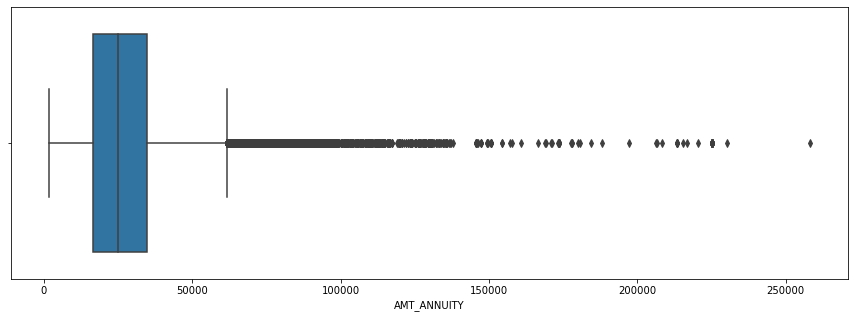

In [21]:
#We need to check for any outliers before imputing missing values. 
#So we will use seaborn boxplot for visualization.
plt.figure(figsize=(15,5))
sns.boxplot(data=df_application,x='AMT_ANNUITY')
plt.show()

**Comment:** Since we can clearly see that there are outliers from this plot, we should impute the missing values with median rather than mean.<br>
This is because, mean gets affected due to outliers whereas median is a safe choice.

In [22]:
#Replace the missing values in AMT_ANNUITY column with median
df_application.AMT_ANNUITY.median()

24903.0

In [23]:
df_application['AMT_ANNUITY'] = df_application.AMT_ANNUITY.replace(np.NaN,df_application.AMT_ANNUITY.median())
#Now check null values, should be equal to 0.
df_application.AMT_ANNUITY.isnull().sum()

0

#### 4.1.2 Cleaning DAYS_LAST_PHONE_CHANGE column for new application data

In [24]:
#Checking the value count and type of data
df_application.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [25]:
df_application.DAYS_LAST_PHONE_CHANGE.dtype

dtype('float64')

**Change Required:** Days cannot be float values, so we should change this column type to integer value.


In [26]:
#Before changing the data type to int, we need to either impute or remove the missing values.
df_application.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

In [27]:
#Changing data type of column DAYS_LAST_PHONE_CHANGE
df_application.DAYS_LAST_PHONE_CHANGE = df_application.DAYS_LAST_PHONE_CHANGE.astype('int64')
#Check data type now
df_application.DAYS_LAST_PHONE_CHANGE.dtype

dtype('int64')

So, we removed the missing value and updated the data type of the column DAYS_LAST_PHONE_CHANGE

#### 4.1.3 Imputing AMT_GOODS_PRICE column and dealing with missing values

In [28]:
#Checking value counts for this column
df_application.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [29]:
#Number of Missing values
df_application.AMT_GOODS_PRICE.isnull().sum()

278

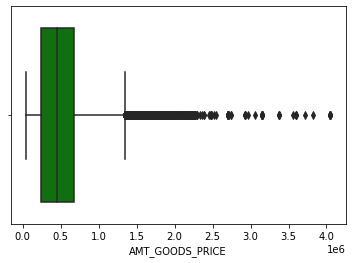

In [30]:
#We should check for outliers first using seaborn boxplot as we did earlier.
sns.boxplot(data=df_application,x='AMT_GOODS_PRICE',color='green')
plt.show()

In [31]:
#To get more understanding, let's describe this column even more.
df_application.AMT_GOODS_PRICE.describe()

count    3.072320e+05
mean     5.383971e+05
std      3.694467e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

**So...:** <br>Continuous variable/column and it has outliers (clearly from the boxplot), we should use median for imputing missing values

In [32]:
#Imputing missing values with median
print("Median is {}".format(df_application.AMT_GOODS_PRICE.median()))
df_application.AMT_GOODS_PRICE = df_application.AMT_GOODS_PRICE.replace(np.NaN,df_application.AMT_GOODS_PRICE.median())

Median is 450000.0


In [33]:
#Checking null values in column AMT_GOODS_PRICE
df_application.AMT_GOODS_PRICE.isnull().sum()

0

Now, we have imputed missing value with median

#### 4.1.4 Imputing missing value for column OCCUPATION_TYPE

In [34]:
#Checking value counts for OCCUPATION_TYPE
df_application.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [35]:
#Checking number of null values
df_application.OCCUPATION_TYPE.isnull().sum()

96390

In [36]:
#Null values seem to be a lot, let's calculate the % of null values
print("% of null values: {}%".format(100 * df_application.OCCUPATION_TYPE.isnull().sum()/df_application.shape[0]))

% of null values: 31.345322103346234%


**NOTE:** As the null % is quite high (around 31.35%), if we assign these to any existing categories such as Laborers or Sales staff etc, it will affect our analysis.
<br> So, we can instead make a new category "Unknown/Missing" and impute the null values with that category.

In [37]:
#Imputing null values with new category.
df_application.OCCUPATION_TYPE = df_application.OCCUPATION_TYPE.replace(np.NaN,"Unknown/Missing")
#Check value_counts()
df_application.OCCUPATION_TYPE.value_counts()

Unknown/Missing          96390
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
#Check null values, should be 0.
df_application.OCCUPATION_TYPE.isnull().sum()

0

**Comment:**<br>
>So, we made a new category called "Unknown/Missing" out of all the missing values and we have 96390 values.

#### 4.1.5 Now we should check the correlation between EXT_SOURCES and TARGET variable and also, if these columns are of any relevance, we need to impute missing values.

In [39]:
#First, we need to see the correlation between these columns
#So,
df_application[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.178919
TARGET,-0.155317,-0.160472,-0.178919,1.000000


_Let's plot a heatmap to visualize this correlation matrix._
<br>Save the above correlation in a variable, let's call it 'ext_source_corr'.

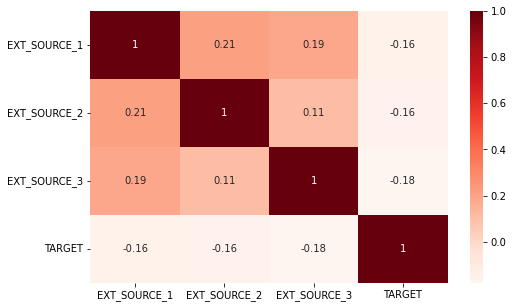

In [40]:
ext_source_corr = df_application[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr()
#Increase the figsize
plt.figure(figsize=(8,5))
#Using sns.heatmap()
sns.heatmap(ext_source_corr,annot=True,cmap='Reds')
plt.show()

**Insights from this Heatmap:**
>1. A value closer to 0 implies that the two variables are not linearly correlated.
>2. A number closer to 1 implies strong positive correlation, while a number close to -1 implies strong negative correlation.
>3. In this case, it is clear that the TARGET variable is not linearly correlated with any of the EXT_SOURCE columns, thus we can **drop these columns**. Then we won't even need to deal with missing values.

In [41]:
#Dropping these EXT_SOURCE columns
df_application.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)
#check shape of dataframe
df_application.shape

(307510, 119)

Number of columns reduced from 122 to 119 = 3 columns removed.

#### 4.1.6 Dropping Building related columns, they have approx. >50% missing values.

In [42]:
print("Shape before dropping:{}".format(df_application.shape))
df_application.drop(df_application.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'].columns,axis=1,inplace=True)
print("Shape after dropping:{}".format(df_application.shape))

Shape before dropping:(307510, 119)
Shape after dropping:(307510, 72)


Just Removed unnecessary columns

#### 4.1.7 Check the correlation between CNT_SOCIAL_CIRCLE variables and if they are relevant then impute the missing values.

In [43]:
#Build the correlation matrix
df_application[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].corr()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.329338,0.998490,0.253499,0.009130
DEF_30_CNT_SOCIAL_CIRCLE,0.329338,1.000000,0.331570,0.860517,0.032247
OBS_60_CNT_SOCIAL_CIRCLE,0.998490,0.331570,1.000000,0.255570,0.009022
DEF_60_CNT_SOCIAL_CIRCLE,0.253499,0.860517,0.255570,1.000000,0.031276
TARGET,0.009130,0.032247,0.009022,0.031276,1.000000


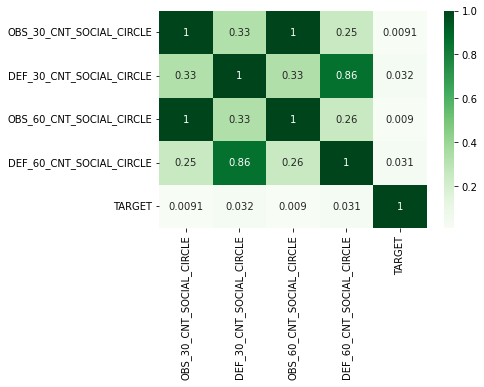

In [44]:
#Plot the heatmap
social_circle_corr = df_application[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','TARGET']].corr()
sns.heatmap(social_circle_corr,cmap='Greens',annot=True)
plt.show()

**Insights from this heatmap:**
>1. Columns DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE can be said to be linearly correlated.
>2. But **TARGET column is not linearly correlated** with any other column since all the values are close to 0. (Which means not linearly correlated)
>3. Drop these columns

In [45]:
#We can remove these columns
df_application.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                     'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)
df_application.shape

(307510, 68)

#### 4.1.8 Find correlation between AMT_REQUIRED_CREDIT columns and impute missing values

In [46]:
#Form the correlation matrix
df_application.loc[:,['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']].corr()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
AMT_REQ_CREDIT_BUREAU_HOUR,1.000000,0.230374,0.004706,-0.000018,-0.002716,-0.004597,0.000930
AMT_REQ_CREDIT_BUREAU_DAY,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355,0.002704
AMT_REQ_CREDIT_BUREAU_WEEK,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.000788
AMT_REQ_CREDIT_BUREAU_MON,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.012462
AMT_REQ_CREDIT_BUREAU_QRT,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,-0.002022
AMT_REQ_CREDIT_BUREAU_YEAR,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.019930
TARGET,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,1.000000


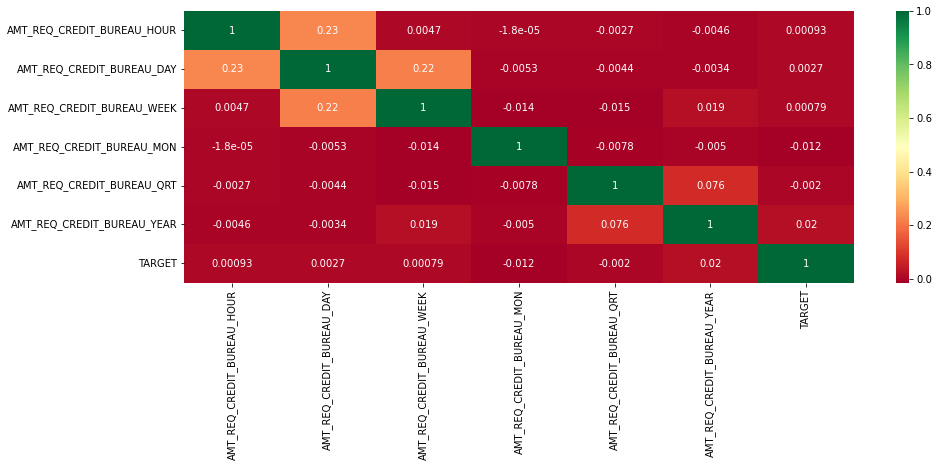

In [47]:
#Plot the heatmap
amt_req_corr = df_application.loc[:,['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']].corr()
plt.figure(figsize=(15,5))
sns.heatmap(amt_req_corr,annot=True,cmap='RdYlGn')
plt.show()

**Insights from heatmap:**
>1. Clearly, more the red, more it indicates no linear correlation.
>2. TARGET value is not linearly correlated with these columns.
>3. We can go ahead and drop these columns if we want.

In [48]:
#Drop these columns as not required.
df_application.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                      'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                      'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],
                   axis=1,
                   inplace=True)
df_application.shape

(307510, 62)

#### 4.1.9 Impute missing values of column NAME_TYPE_SUITE

In [49]:
#Check value_count
df_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248525
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [50]:
#Check missing values
pct = 100 * df_application.NAME_TYPE_SUITE.isnull().sum()/df_application.shape[0]
print("Missing Values: {}%".format(pct))

Missing Values: 0.4201489382459107%


In [51]:
#Since the % of missing values is less, if we replace the missing values with mode, it won't affect our data much.
#Find the mode.
TYPE_SUITE_MODE = df_application.NAME_TYPE_SUITE.mode()[0]
TYPE_SUITE_MODE

'Unaccompanied'

In [52]:
#Replace missing values with mdoe
df_application.NAME_TYPE_SUITE = df_application.NAME_TYPE_SUITE.replace(np.NaN,TYPE_SUITE_MODE)
#Check null values, should be 0.
df_application.NAME_TYPE_SUITE.isnull().sum()

0

In [53]:
df_application.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249817
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**Comment:** We can see value count of 'Unaccompanied' increased.

#### 4.1.10 Drop column OWN_CAR_AGE

In [54]:
#Check missing value %
df_application.OWN_CAR_AGE.isnull().sum()/df_application.shape[0] *100

65.99102468212415

In [55]:
#Since ~66% values are missing, this column is of no use and we should just drop this column.
df_application.drop(['OWN_CAR_AGE'],axis=1,inplace=True)
df_application.shape

(307510, 61)

### 4.2 Now, verify we've completely dealt with missing values

In [56]:
#Verification, just to confirm and it's better to know now than later :)
df_application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RAT

***We actually found out that there is column CNT_FAM_MEMBERS with 2 missing values***

**Imputing CNT_FAM_MEMBERS missing values**

In [57]:
#Check value counts
df_application.CNT_FAM_MEMBERS.value_counts()

2.0     158356
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [58]:
#Replace missing value with mode because % missing value is very very low.
cnt_fam_mem_mode = df_application.CNT_FAM_MEMBERS.mode()[0]
cnt_fam_mem_mode

2.0

In [59]:
#Replace
df_application.CNT_FAM_MEMBERS = df_application.CNT_FAM_MEMBERS.fillna(cnt_fam_mem_mode)
df_application.CNT_FAM_MEMBERS.value_counts()

2.0     158358
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

**Checking Gender Column**

In [60]:
df_application.CODE_GENDER.value_counts()

F      202448
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

In [61]:
#Since we don't have information about XNA Gender, we should replace it with the mode of Gender.
df_application.CODE_GENDER = df_application.CODE_GENDER.replace('XNA',df_application.CODE_GENDER.mode()[0])

In [62]:
#Check value count
df_application.CODE_GENDER.value_counts()

F    202452
M    105058
Name: CODE_GENDER, dtype: int64

## 5. Data Analysis for new application (df_application) dataframe

### 5.1 Checking Data Imbalance

In [63]:
df_application.TARGET.value_counts(normalize=True)*100

0    91.927092
1     8.072908
Name: TARGET, dtype: float64

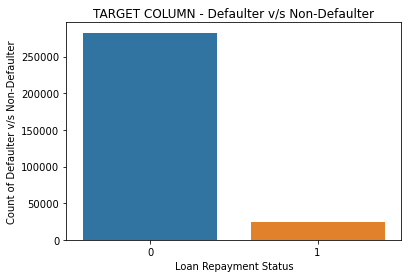

In [64]:
#Plot
sns.countplot(df_application.TARGET)
plt.title('TARGET COLUMN - Defaulter v/s Non-Defaulter')
plt.ylabel("Count of Defaulter v/s Non-Defaulter")
plt.xlabel("Loan Repayment Status")
plt.show()

>1. 1 indicates Defaulter
>2. 0 indicates Non-Defaulter/Repayer

**Insights:**
<br>1. Clearly, we can see there is huge data imbalance between number of defaulters v/s number of non-defaulters.
<br>2. Percentage of non-defaulters = 91.93%
<br>3. Percentage of defaulters = 8.07%
<br>4. Data Imbalance Ratio => approx. 8:92 = 2:23

### 5.2 Performing Univariate/Bivariate and Multivariate analysis by segments

In [65]:
#For understanding the data more clearly, and analyzing columns on the basis of TARGET variable,
#We can create a function to provide us the defaulter percentage for each of the category.
def calculate_defaulter_pct(df,col):
    temp_df = pd.DataFrame(columns=['Category','Defaulter Percentage'])
    for cat in df[col].unique():
        defaulter_count = df[(df[col]==cat) & (df['TARGET']==1)].shape[0]
        total_count = df[df[col]==cat].shape[0]
        temp_df = temp_df.append({'Category':cat,'Defaulter Percentage':(defaulter_count/total_count * 100)},ignore_index=True)
    return temp_df.sort_values(by='Defaulter Percentage',ascending=False)

### Segment 1: Contract Type counts in the dataset.
Here our goal is to understand the distribution of Contract types based on our target variable (repayment status).

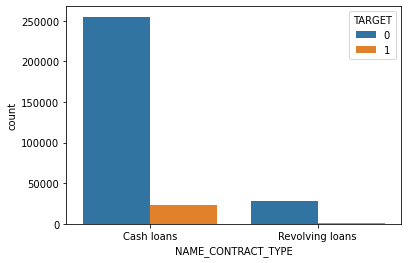

In [66]:
sns.countplot(x='NAME_CONTRACT_TYPE',data=df_application,hue='TARGET')
plt.show()

In [67]:
calculate_defaulter_pct(df_application,'NAME_CONTRACT_TYPE')

,Category,Defaulter Percentage
0,Cash loans,8.345943
1,Revolving loans,5.478329


**Insights:**
1. There is Contract Type imbalance because Cash loans are much more in comparison to Revolving loans.
2. Defaulter percentage of Cash loans = 8.34 %
3. Defaulter percentage of Revolving loans = 5.47%
4. This tells us, that we should try to decrease the cash loans and try to increase the revolving loans since loan defaulters are less for Revolving loans.

### Segment 2: Gender Imbalance
Understanding gender imbalance in the data and gender imbalance on the basis of TARGET variable.

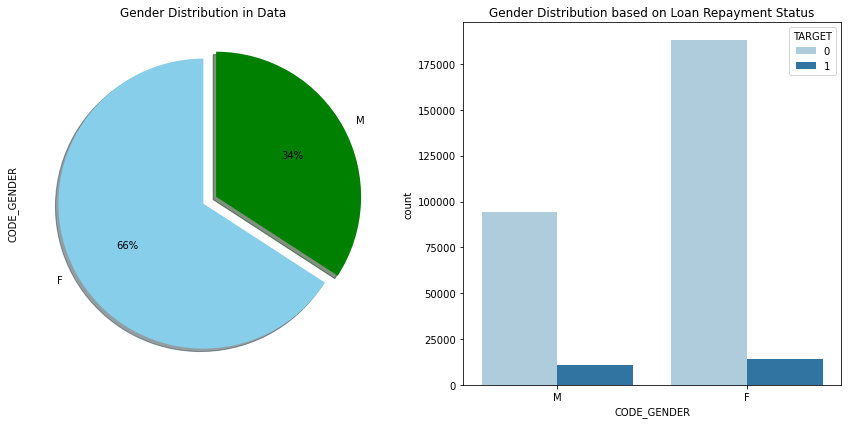

In [68]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

colors=("skyblue","green")
(df_application.CODE_GENDER.value_counts(normalize=True)*100).plot.pie(
    autopct='%1.f%%',shadow=True,explode=(0,0.1),startangle=90,colors=colors,ax=ax1)
ax1.set_title('Gender Distribution in Data')

sns.countplot(data=df_application,x='CODE_GENDER',hue='TARGET',palette='Paired',ax=ax2)
ax2.set_title('Gender Distribution based on Loan Repayment Status')
fig.tight_layout()

plt.show()

>Percentage of Females in data = 66% <br>
>Percentage of Males in data = 34%

In [69]:
calculate_defaulter_pct(df_application,'CODE_GENDER')

,Category,Defaulter Percentage
0,M,10.142017
1,F,6.999190


### Segment 3: Understanding Asset details of the applicant

In [70]:
#Understanding columns FLAG_OWN_CAR,FLAG_OWN_REALTY
df_application[['FLAG_OWN_CAR','FLAG_OWN_REALTY','TARGET']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FLAG_OWN_CAR     307510 non-null  object
 1   FLAG_OWN_REALTY  307510 non-null  object
 2   TARGET           307510 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 17.4+ MB


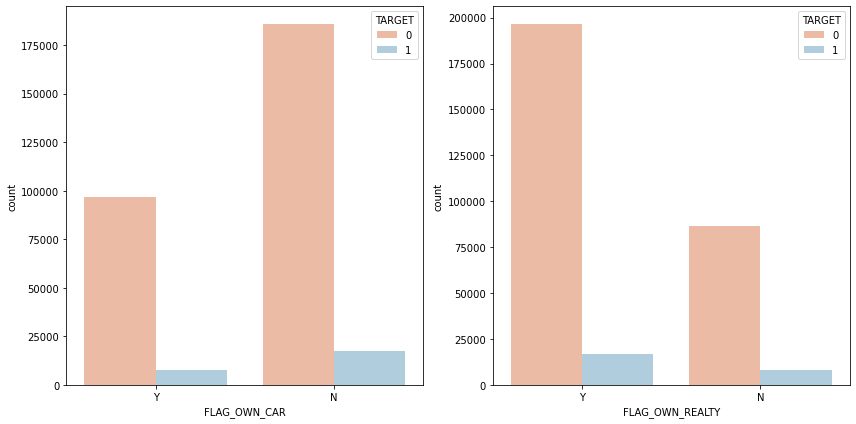

In [71]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df_application,x='FLAG_OWN_CAR',hue='TARGET',ax=ax1,order=['Y','N'],palette='RdBu')
sns.countplot(data=df_application,x='FLAG_OWN_REALTY',hue='TARGET',ax=ax2,order=['Y','N'],palette='RdBu')
fig.tight_layout()
plt.show()

In [72]:
calculate_defaulter_pct(df_application,'FLAG_OWN_CAR')

,Category,Defaulter Percentage
0,N,8.500227
1,Y,7.243799


In [73]:
calculate_defaulter_pct(df_application,'FLAG_OWN_REALTY')

,Category,Defaulter Percentage
1,N,8.324929
0,Y,7.961615


**Insights:**
1. Number of applicants who own a car are much less than the applicants who don't own a car.
2. Number of applicants who own a realty are much more than the number of applicants who don't own a realty.
3. According to defaulter percentage, applicants who don't own a car and realty are much more likely to be defaulters 
than the ones who have their own cars and realty.

### Segment 4: Family Member Count Analysis

In [74]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
df_application[['CNT_CHILDREN','CNT_FAM_MEMBERS']].corr()

,CNT_CHILDREN,CNT_FAM_MEMBERS
CNT_CHILDREN,1.00000,0.87916
CNT_FAM_MEMBERS,0.87916,1.00000


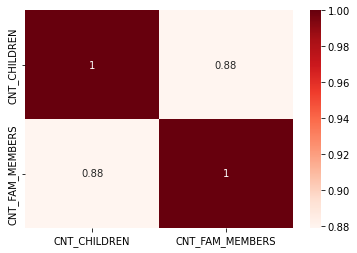

In [76]:
sns.heatmap(df_application[['CNT_CHILDREN','CNT_FAM_MEMBERS']].corr(),cmap='Reds',annot=True)
plt.show()

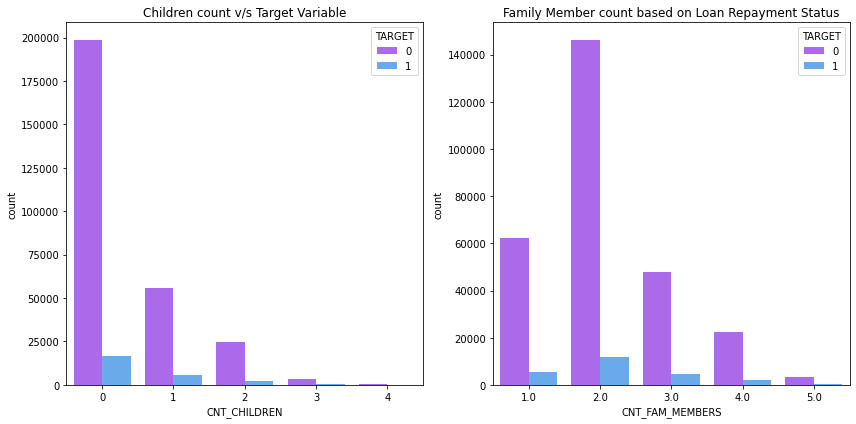

In [77]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

temp_df1 = df_application[df_application['CNT_CHILDREN']<5]
temp_df2 = df_application[df_application['CNT_FAM_MEMBERS']<6]
sns.countplot(data=temp_df1,x='CNT_CHILDREN',hue='TARGET',palette='cool_r',ax=ax1)
ax1.set_title('Children count v/s Target Variable')
sns.countplot(data=temp_df2,x='CNT_FAM_MEMBERS',hue='TARGET',palette='cool_r',ax=ax2)
ax2.set_title('Family Member count based on Loan Repayment Status')
fig.tight_layout()

plt.show()

We reduced our dataframe to Children Count<5 and Family Count<6 because it would help in visualization and any value beyond this might be considered as an outlier.

In [78]:
calculate_defaulter_pct(df_application,'CNT_CHILDREN')

,Category,Defaulter Percentage
9,9.0,100.000000
10,11.0,100.000000
7,6.0,28.571429
4,4.0,12.820513
3,3.0,9.631423
1,1.0,8.923575
2,2.0,8.721821
6,5.0,8.333333
0,0.0,7.711845
5,7.0,0.000000


In [79]:
calculate_defaulter_pct(df_application,'CNT_FAM_MEMBERS')

,Category,Defaulter Percentage
16,11.0,100.000000
10,13.0,100.000000
9,10.0,33.333333
8,8.0,30.000000
5,6.0,13.480392
4,5.0,9.401955
2,3.0,8.760290
3,4.0,8.648824
0,1.0,8.364408
1,2.0,7.583450


**Insights:**
1. Applicants with very large number of children/family member count and defaulter percentage also high or even low,cannot be used for providing insights since the frequency of such applicants is very low.
2. Applicants with 0 children have a defaulter percentage of 7.71%, so they are likely to be non-defaulters/repayers.
3. Applicants with 2 family members have a defaulter percentage of 7.58%, so they are likely to be non-defaulters/repayers and should be approved for there loan.

### Segment 5: Flag Documents Submitted 

In [80]:
#Find all the columns for the correlation matrix
cols = list(df_application.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'])
cols.append('TARGET')
cols
flags_corr = df_application.loc[:,cols].corr()
flags_corr

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
FLAG_DOCUMENT_2,1.000000,-0.010174,-0.000059,-0.000805,-0.002020,-0.000090,-0.001935,-0.000407,-0.000031,-0.000407,-0.000017,-0.000387,-0.000353,-0.000226,-0.000651,-0.000106,-0.000589,-0.000159,-0.000146,-0.000119,0.005417
FLAG_DOCUMENT_3,-0.010174,1.000000,-0.014110,-0.193851,-0.486241,-0.021677,-0.465723,-0.097860,-0.007466,-0.093243,-0.001180,-0.020275,0.002099,0.000592,0.033417,0.002536,0.008034,0.009423,0.007395,-0.025510,0.044345
FLAG_DOCUMENT_4,-0.000059,-0.014110,1.000000,-0.001117,-0.002802,-0.000125,-0.002684,-0.000564,-0.000043,-0.000565,-0.000023,-0.000536,-0.000489,-0.000314,-0.000903,-0.000147,-0.000816,-0.000220,-0.000203,-0.000165,-0.002672
FLAG_DOCUMENT_5,-0.000805,-0.193851,-0.001117,1.000000,-0.038495,-0.001716,-0.036871,-0.007747,-0.000591,-0.007764,-0.000316,-0.007368,-0.006723,-0.004311,-0.012137,-0.002023,-0.010620,-0.003023,-0.002791,0.000645,-0.000316
FLAG_DOCUMENT_6,-0.002020,-0.486241,-0.002802,-0.038495,1.000000,-0.004305,-0.092484,-0.019433,-0.001483,-0.018738,-0.000792,-0.017514,-0.014319,-0.009824,-0.026603,-0.004372,-0.023909,-0.004759,-0.005981,-0.005688,-0.028602
FLAG_DOCUMENT_7,-0.000090,-0.021677,-0.000125,-0.001716,-0.004305,1.000000,-0.004123,-0.000866,-0.000066,-0.000868,-0.000035,-0.000824,-0.000752,-0.000482,-0.001387,-0.000226,-0.001254,-0.000338,-0.000312,-0.000254,-0.001520
FLAG_DOCUMENT_8,-0.001935,-0.465723,-0.002684,-0.036871,-0.092484,-0.004123,1.000000,-0.018613,-0.001420,-0.017509,0.003905,0.077021,0.030229,0.023518,0.012785,0.005338,0.007637,0.000053,0.003859,-0.001548,-0.008037
FLAG_DOCUMENT_9,-0.000407,-0.097860,-0.000564,-0.007747,-0.019433,-0.000866,-0.018613,1.000000,-0.000298,-0.003919,-0.000159,0.000684,0.001430,0.002329,0.008480,0.008570,0.001898,-0.001526,-0.001409,-0.001145,-0.004352
FLAG_DOCUMENT_10,-0.000031,-0.007466,-0.000043,-0.000591,-0.001483,-0.000066,-0.001420,-0.000298,1.000000,-0.000299,-0.000012,-0.000284,-0.000259,-0.000166,-0.000478,-0.000078,-0.000432,-0.000116,-0.000107,-0.000087,-0.001414
FLAG_DOCUMENT_11,-0.000407,-0.093243,-0.000565,-0.007764,-0.018738,-0.000868,-0.017509,-0.003919,-0.000299,1.000000,-0.000160,-0.003727,-0.003401,-0.002181,-0.006276,-0.001024,-0.005673,-0.001529,-0.001412,-0.001147,-0.004229


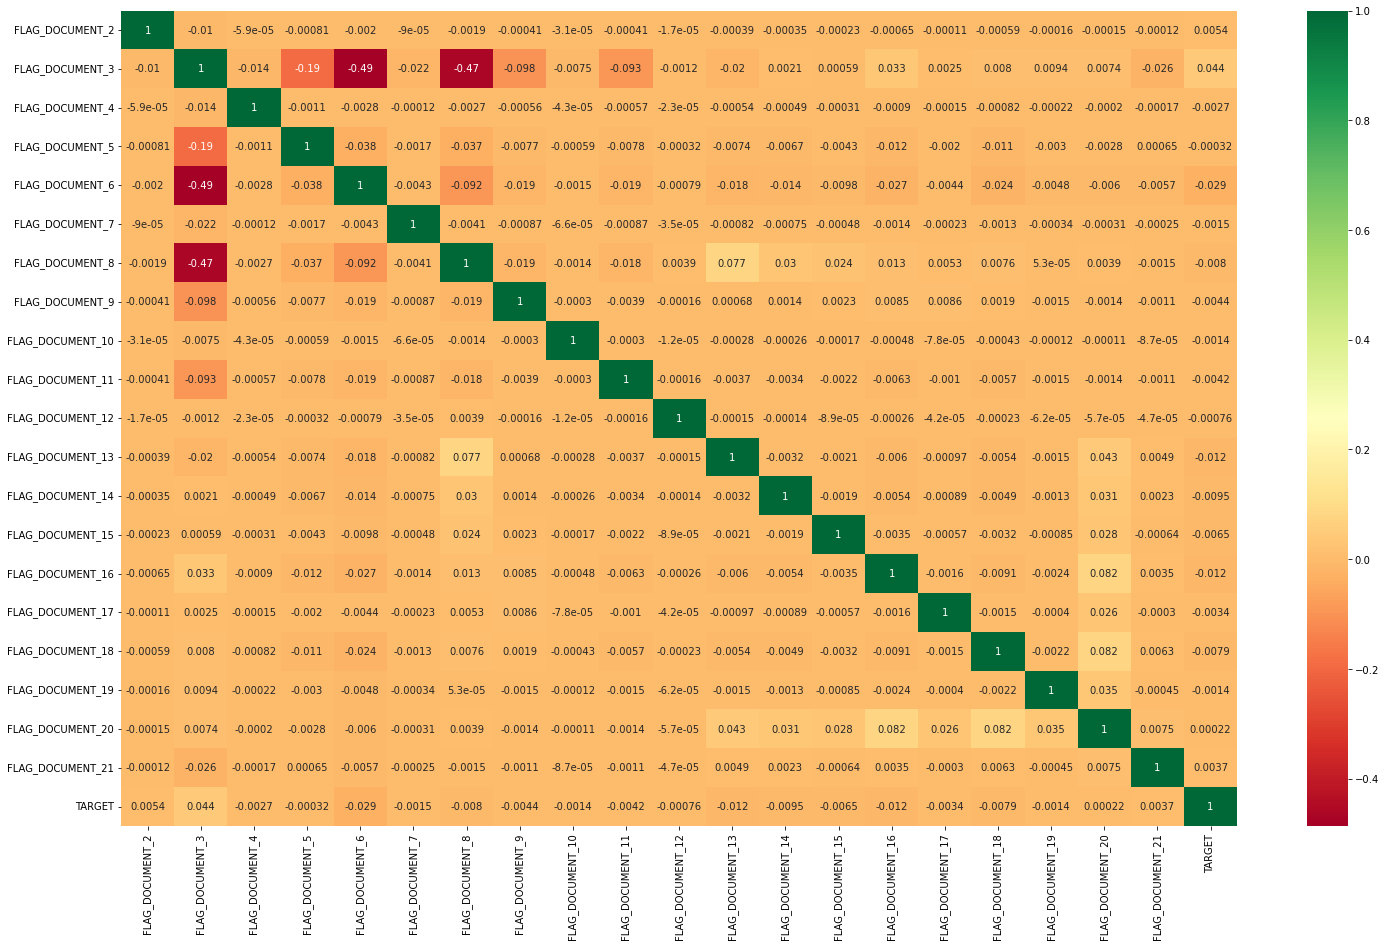

In [81]:
#Plotting the heatmap using seaborn
plt.figure(figsize=(25,15))
sns.heatmap(flags_corr,annot=True,cmap='RdYlGn')
plt.show()

**Observation:**
>1. A correlation value around -1 and +1 means strong negative/positive linear correlation.
>2. None of the FLAG_DOCUMENTS are linearly correlated with TARGET Variable, except that we see some values in **RED COLOR for FLAG_DOCUMENT_3** with correlation of -0.47 which is pretty much different from the rest of the values.
>3. So we can drop all these unnecessary FLAG columns except FLAG_DOCUMENT_3 and analyse it.

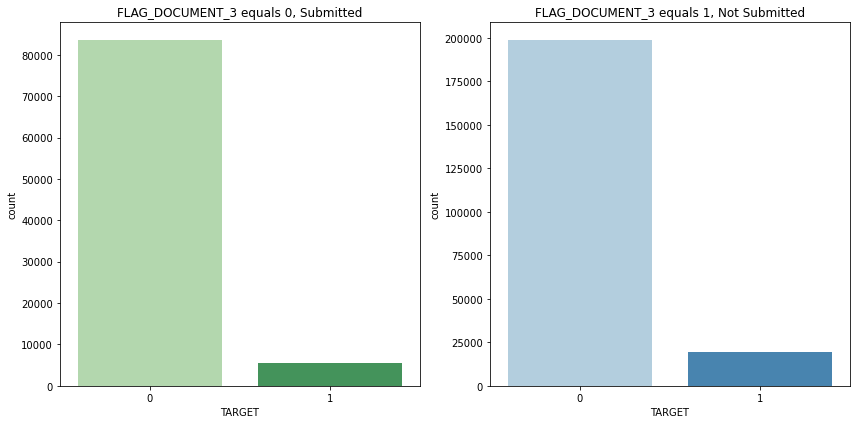

In [82]:
#Plotting FLAG_DOCUMENT_3 for analysis.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df_application[df_application['FLAG_DOCUMENT_3']==0],x='TARGET',palette='Greens',ax=ax1)
ax1.set_title('FLAG_DOCUMENT_3 equals 0, Submitted')
sns.countplot(data=df_application[df_application['FLAG_DOCUMENT_3']==1],x='TARGET',palette='Blues',ax=ax2)
ax2.set_title('FLAG_DOCUMENT_3 equals 1, Not Submitted')
fig.tight_layout()

plt.show()

**The plot looks same, but they are not same since there is a huge difference in the values on y_axis (count).** <br>
*So we should set them to same limit, so as to get better visualization*

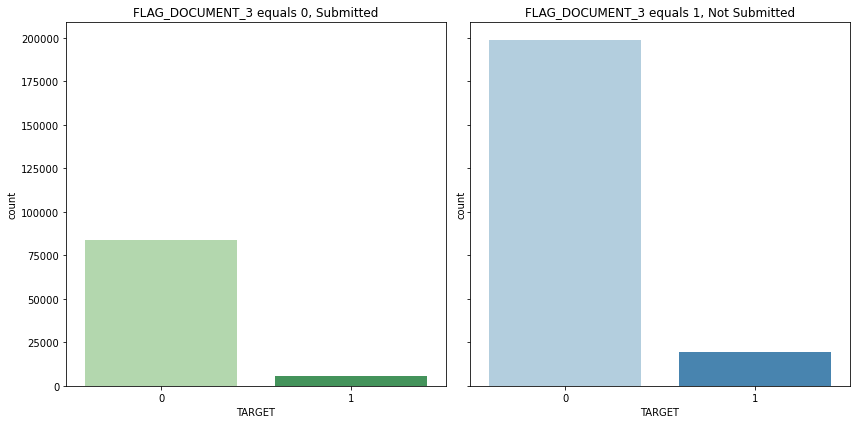

In [83]:
#We just need to add ***sharey=True***, So now both the plots share the y_axis and we can visualize better.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6),sharey=True)

sns.countplot(data=df_application[df_application['FLAG_DOCUMENT_3']==0],x='TARGET',palette='Greens',ax=ax1)
ax1.set_title('FLAG_DOCUMENT_3 equals 0, Submitted')

sns.countplot(data=df_application[df_application['FLAG_DOCUMENT_3']==1],x='TARGET',palette='Blues',ax=ax2)
ax2.set_title('FLAG_DOCUMENT_3 equals 1, Not Submitted')
fig.tight_layout()

plt.show()

**Insights:**
1. FLAG_DOCUMENT_3, no matter if the document is submitted or not,gives us similar trend for both non-defaulters and defaulters
2. We can drop this column since it would be of no useful insight.

### Segment 6: Other Categorical Columns analysis (Housing Type and Family Status)

Here we our trying to find some insights from Categorical Columns 'NAME_HOUSING_TYPE' and 'NAME_FAMILY_STATUS'.

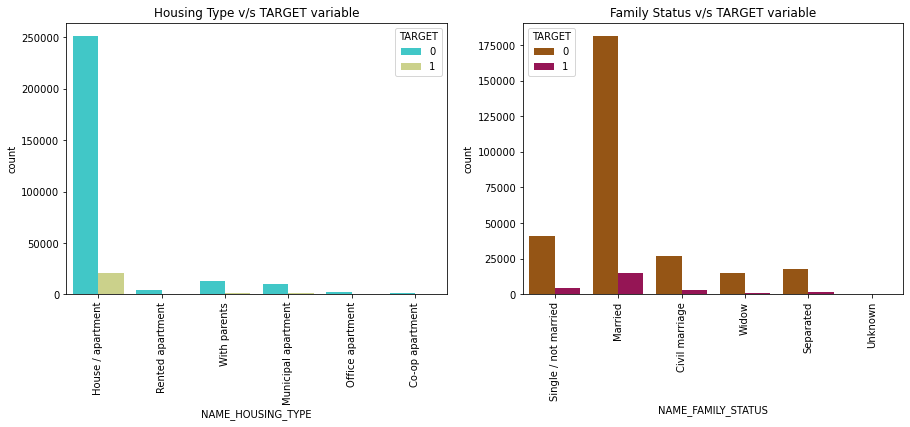

In [84]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_application,x='NAME_HOUSING_TYPE',hue='TARGET',ax=ax1,palette='rainbow')
ax1.set_title('Housing Type v/s TARGET variable')
ax1.tick_params(axis='x',rotation=90)

sns.countplot(data=df_application,x='NAME_FAMILY_STATUS',hue='TARGET',ax=ax2,palette='brg_r')
ax2.tick_params(axis='x',rotation=90)
ax2.set_title('Family Status v/s TARGET variable')
plt.show()

In [85]:
#Get some more detail regarding defaulter percentage for housing type
calculate_defaulter_pct(df_application,'NAME_HOUSING_TYPE')

,Category,Defaulter Percentage
1,Rented apartment,12.313051
2,With parents,11.698113
3,Municipal apartment,8.539748
5,Co-op apartment,7.932264
0,House / apartment,7.795739
4,Office apartment,6.572411


In [86]:
#Get some more detail regarding defaulter percentage for family status
calculate_defaulter_pct(df_application,'NAME_FAMILY_STATUS')

,Category,Defaulter Percentage
2,Civil marriage,9.944584
0,Single / not married,9.807675
4,Separated,8.194234
1,Married,7.559907
3,Widow,5.824217
5,Unknown,0.000000


**Insights from above 2 countplots:**
>1. A lot of applicants live in House/Apartment
>2. Applicants with Family Status as "with parents" or "Rented apartment" have much higher rate of default.
>3. Most of the applicants are married and still with 7.55% defaulter percentage, which is really good.

### Segment 7: Professional Life of Applicant

Here we will try to analyze the columns that represent professional life of an applicant such as NAME_INCOME_TYPE, NAME_EDUCATION_TYPE
, OCCUPATION_TYPE.

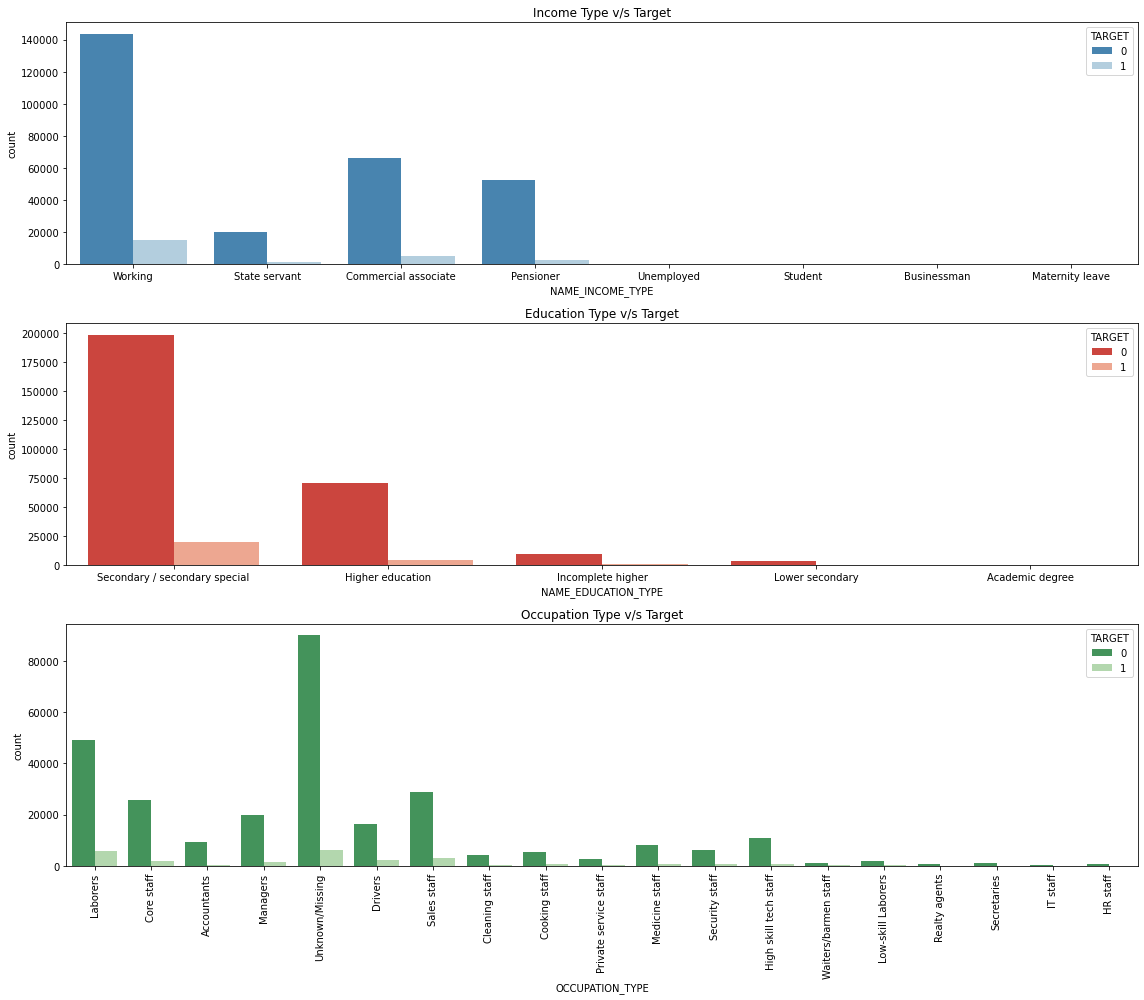

In [87]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,14))

sns.countplot(data=df_application,x='NAME_INCOME_TYPE',hue='TARGET',ax=ax1,palette='Blues_r')
ax1.set_title('Income Type v/s Target')

sns.countplot(data=df_application,x='NAME_EDUCATION_TYPE',hue='TARGET',ax=ax2,palette='Reds_r')
ax2.set_title('Education Type v/s Target')

sns.countplot(data=df_application,x='OCCUPATION_TYPE',hue='TARGET',ax=ax3,palette='Greens_r')
ax3.set_title('Occupation Type v/s Target',)
ax3.tick_params(axis='x',rotation=90)

fig.tight_layout()
plt.show()

In [88]:
calculate_defaulter_pct(df_application,'NAME_INCOME_TYPE')

,Category,Defaulter Percentage
7,Maternity leave,40.000000
4,Unemployed,36.363636
0,Working,9.588532
2,Commercial associate,7.484257
1,State servant,5.754965
3,Pensioner,5.386366
5,Student,0.000000
6,Businessman,0.000000


**Observation:**
1. Applicants on Maternity leave or if they are unemployed have the highest chances of defaulting.
2. Applicants who are working, or Pensioner or Commerical associate are good since the defaulting percentage is not much.
3. Applicants in ('Unemployed','Student','Businessman','Maternity leave') don't contribute much to the analysis as there is not much data available for these types.

In [89]:
calculate_defaulter_pct(df_application,'NAME_EDUCATION_TYPE')

,Category,Defaulter Percentage
3,Lower secondary,10.927673
0,Secondary / secondary special,8.939929
2,Incomplete higher,8.485792
1,Higher education,5.355115
4,Academic degree,1.829268


**Observation:**
1. Applicants with 'Academic degree' even with defaulter percentage only 1.83 won't contribute to the analysis because there is not much data.
2. There is a clear observation that applicants of education type 'Lower Secondary' have high defaulting chance.

In [90]:
calculate_defaulter_pct(df_application,'OCCUPATION_TYPE')

,Category,Defaulter Percentage
14,Low-skill Laborers,17.152413
5,Drivers,11.326130
13,Waiters/barmen staff,11.275964
11,Security staff,10.742449
0,Laborers,10.578770
8,Cooking staff,10.443996
6,Sales staff,9.631799
7,Cleaning staff,9.606705
15,Realty agents,7.856192
16,Secretaries,7.049808


**Observation:**
1. Most of the applicants data have Occupation type as "Unknown/Missing" and defaulter percentage is 6.5%.
2. Low-skill laborers are the applicants with highest defaulter percentage.

In [91]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Segment 8: Application Process Start Day relevance

Check if application process start day has any relevance with defaulter or non-defaulter variable.

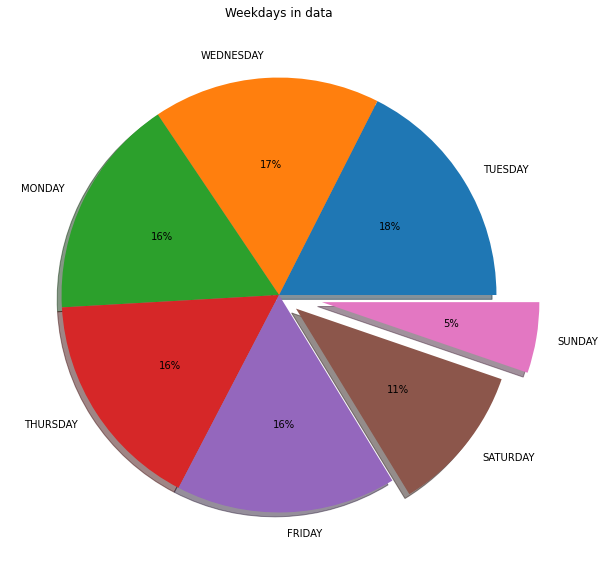

In [92]:
plt.figure(figsize=(10,10))
df_application.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.pie(
    autopct='%1.0f%%',explode=(0,0,0,0,0,0.1,0.2),
    shadow=True)
plt.ylabel('')
plt.title('Weekdays in data')
plt.show()

>**Here:** Applicants are similar for all weekdays, Weekends have less number of applicants.

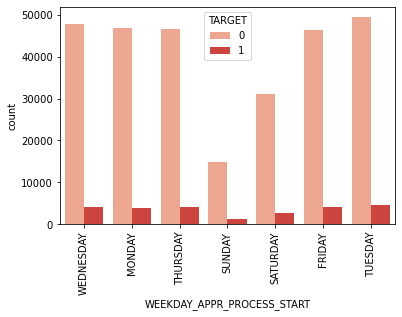

In [93]:
sns.countplot(data=df_application,x='WEEKDAY_APPR_PROCESS_START',hue='TARGET',palette='Reds')
plt.xticks(rotation=90)
plt.show()

In [94]:
calculate_defaulter_pct(df_application,'WEEKDAY_APPR_PROCESS_START')

,Category,Defaulter Percentage
6,TUESDAY,8.350494
0,WEDNESDAY,8.160357
5,FRIDAY,8.147089
2,THURSDAY,8.100255
3,SUNDAY,7.929053
4,SATURDAY,7.887274
1,MONDAY,7.757227


**Observation:** All days have almost equal percentage of defaulters.

## 5.3 Now that we are done with categorical data, let's analyze the numerical columns and find useful insights

### Segment 9: Total Income amount of each applicant

In [95]:
#Check value counts
df_application.AMT_INCOME_TOTAL.value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

Maybe it's better to bin these continuous values to get some useful insights

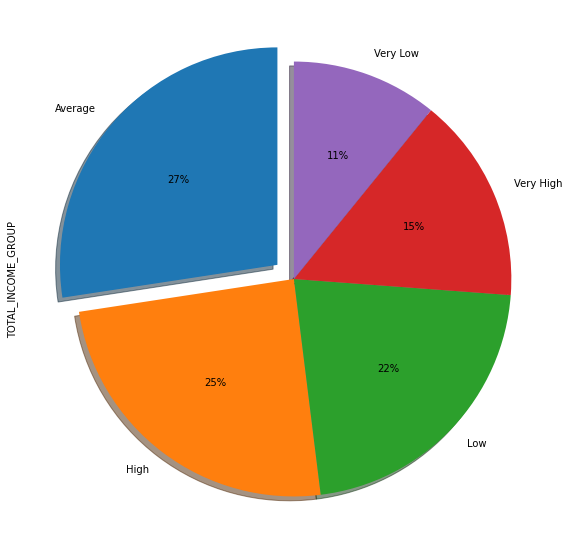

In [96]:
#Binning
df_application['TOTAL_INCOME_GROUP'] = pd.qcut(df_application.AMT_INCOME_TOTAL,
                                               q=[0,0.1,0.3,0.6,0.8,1],
                                               labels=['Very Low','Low','Average','High','Very High'])
plt.figure(figsize=(10,10))
df_application.TOTAL_INCOME_GROUP.value_counts().plot.pie(autopct='%1.0f%%',
                                                         shadow=True,
                                                         explode=(0.1,0,0,0,0),
                                                         startangle=90)
plt.show()

**Income group percentage:**
>Very low Income: 11% <br>
>Low Income: 22% <br>
>Average Income: 27% <br>
>High Income: 25% <br>
>Very High Income: 15% <br>
<br>
<br>
Most of the applicants have average salary.

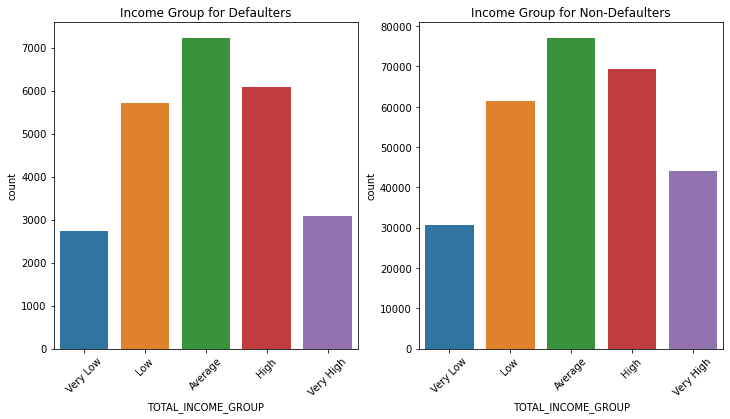

In [97]:
#Let's try to print count plot based on target variables and Total income group of the applicant.
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df_application[df_application.TARGET==1],x='TOTAL_INCOME_GROUP',ax=ax1)
ax1.set_title('Income Group for Defaulters')
ax1.tick_params(axis='x',rotation=45)

sns.countplot(data=df_application[df_application.TARGET==0],x='TOTAL_INCOME_GROUP',ax=ax2)
ax2.set_title('Income Group for Non-Defaulters')
ax2.tick_params(axis='x',rotation=45)

plt.show()

In [98]:
calculate_defaulter_pct(df_application,'TOTAL_INCOME_GROUP')

,Category,Defaulter Percentage
3,Average,8.571666
4,Low,8.495691
2,Very Low,8.190830
0,High,8.056891
1,Very High,6.519801


**Observation:**
1. Applicants in average income group have more defaulter percentage than other groups.
2. Applicants with very high income tend to default less often compared to other groups.

### Segment 10: AMT_CREDIT , AMT_ANNUITY and AMT_GOODS_PRICE 
These might be correlated according to the description of the columns, so let's check if they are correlated or not, and whether how relevant are these columns.

In [99]:
df_application[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr()

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.770127,0.986734
AMT_ANNUITY,0.770127,1.000000,0.774837
AMT_GOODS_PRICE,0.986734,0.774837,1.000000


>0.77 and 0.98 are a good enough values

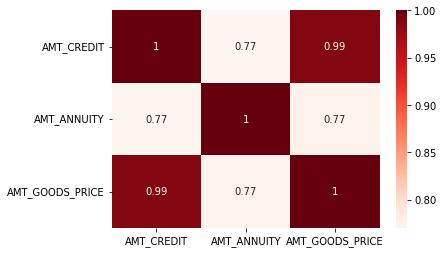

In [100]:
#Let's draw the heatmap too.
sns.heatmap(df_application[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].corr(),
           cmap='Reds',annot=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

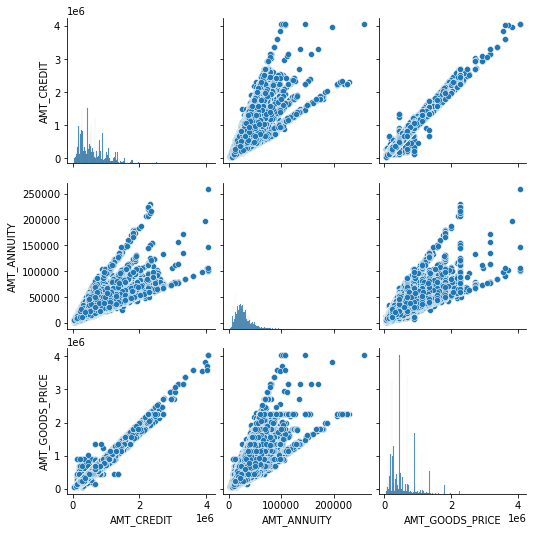

In [101]:
#Plot pair plot
plt.figure(figsize=(15,8))
sns.pairplot(data=df_application,vars=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'])
plt.show()

**Insights from Pairplot:**
>1. AMT_CREDIT and AMT_GOODS_PRICE are very strongly correlated.

### Segment 11: Age of the applicant
From the data itself, we can see column DAYS_BIRTH can be actually used to calculate the age of the applicant and we can do analysis on that.

In [102]:
df_application['APPLICANT_AGE'] = abs(df_application.DAYS_BIRTH)//365.25
#The time in days is equal to the years multiplied by 365.2425.
df_application.APPLICANT_AGE.value_counts().sort_index()

20.0       1
21.0    1276
22.0    2962
23.0    4070
24.0    3923
25.0    4176
26.0    4555
27.0    8552
28.0    7997
29.0    7673
30.0    7778
31.0    8421
32.0    7894
33.0    7719
34.0    7664
35.0    7754
36.0    8660
37.0    8789
38.0    8913
39.0    8739
40.0    8659
41.0    8465
42.0    8195
43.0    8284
44.0    7803
45.0    7263
46.0    7260
47.0    7012
48.0    6981
49.0    6677
50.0    6407
51.0    6729
52.0    6798
53.0    7447
54.0    7616
55.0    6535
56.0    6886
57.0    6733
58.0    6258
59.0    6685
60.0    6177
61.0    5390
62.0    5525
63.0    5183
64.0    5150
65.0    3001
66.0    2036
67.0    2078
68.0     760
69.0       1
Name: APPLICANT_AGE, dtype: int64

>**We can see ages are between 20- 69.**
*We can bin them and analyze further*

In [103]:
#Bin APPLICANT_AGE (20-70)
df_application['APPLICANT_AGE_GROUP'] = pd.cut(df_application.APPLICANT_AGE,
                                               bins=np.arange(20,71,10))
df_application['APPLICANT_AGE_GROUP'].value_counts()

(30, 40]    83212
(40, 50]    74347
(50, 60]    67864
(20, 30]    52962
(60, 70]    29124
Name: APPLICANT_AGE_GROUP, dtype: int64

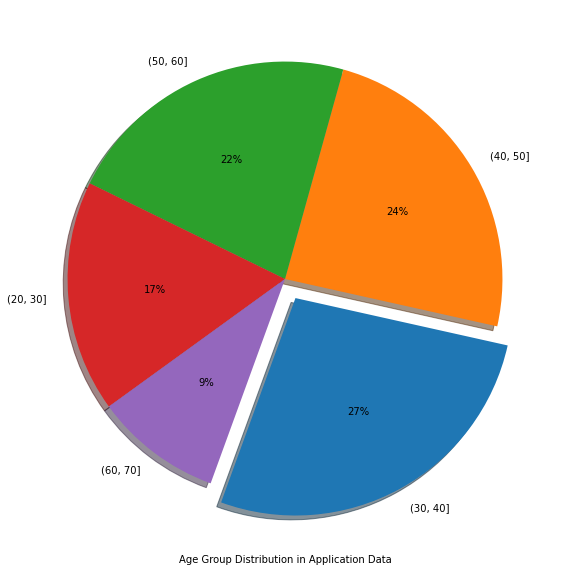

In [104]:
plt.figure(figsize=(10,10))
df_application.APPLICANT_AGE_GROUP.value_counts().plot.pie(autopct='%1.0f%%',
                                                         shadow=True,
                                                         explode=(0.1,0,0,0,0),
                                                         startangle=250)
plt.ylabel('')
plt.xlabel('Age Group Distribution in Application Data')
plt.show()

**Observations:**
>1. Majority of the applicants lie in the age of (30,40]
>2. Very few applicants are there in the age group (60,70]

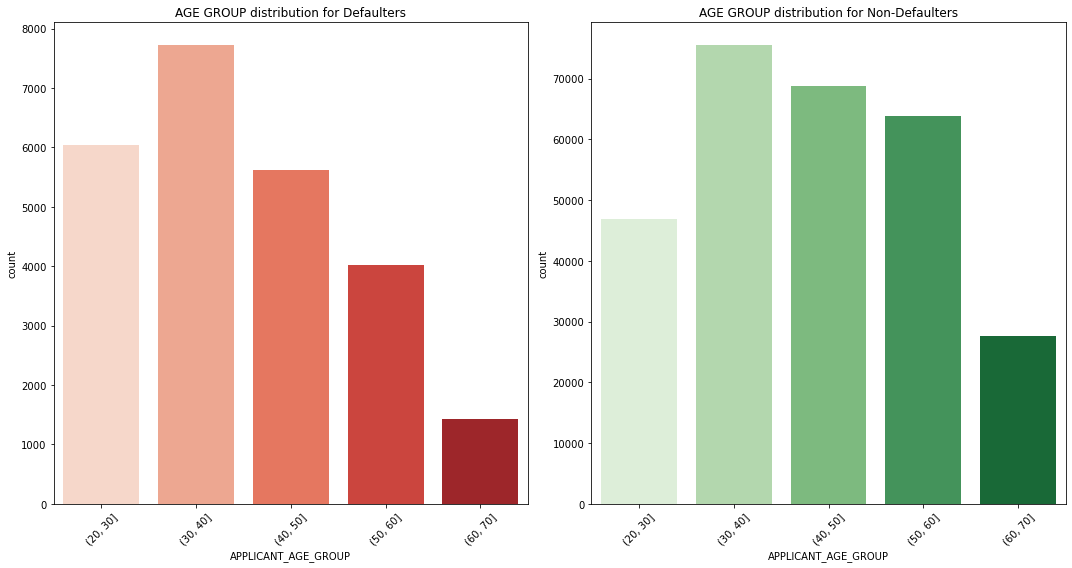

In [105]:
#Plotting Age group for defaulters and non-defaulters
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))

sns.countplot(data=df_application[df_application['TARGET']==1],x='APPLICANT_AGE_GROUP',palette='Reds',ax=ax1)
ax1.set_title('AGE GROUP distribution for Defaulters')
ax1.tick_params(axis='x',rotation=45)

sns.countplot(data=df_application[df_application['TARGET']==0],x='APPLICANT_AGE_GROUP',palette='Greens',ax=ax2)
ax2.set_title('AGE GROUP distribution for Non-Defaulters')
ax2.tick_params(axis='x',rotation=45)

fig.tight_layout()
plt.show()

**Insights:**
1. Applicants of age group (30,40] are much more likely to be defaulters compared to other age groups.
2. As the age group is increasing, applicants tend to default less often (starting from age:30). This could be because people get married and earn more, so they are able to pay their loan.

## 5.4 Finding top 10 correlations

### 5.4.1 Finding top 10 correlations for defaulters

In [106]:
defaulter_df = df_application[df_application['TARGET']==1]
defaulter_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG

In [107]:
defaulter_corr = defaulter_df.corr()
defaulter_corr = defaulter_corr.unstack().reset_index()
defaulter_corr

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,-0.005144
3,SK_ID_CURR,AMT_INCOME_TOTAL,-0.010165
4,SK_ID_CURR,AMT_CREDIT,-0.001290
...,...,...,...
2495,APPLICANT_AGE,FLAG_DOCUMENT_18,-0.028020
2496,APPLICANT_AGE,FLAG_DOCUMENT_19,-0.000325
2497,APPLICANT_AGE,FLAG_DOCUMENT_20,-0.000198
2498,APPLICANT_AGE,FLAG_DOCUMENT_21,-0.033647


In [108]:
#Update column names
defaulter_corr.columns=['Col1','Col2','Correlation']
defaulter_corr

,Col1,Col2,Correlation
0,SK_ID_CURR,SK_ID_CURR,1.000000
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,-0.005144
3,SK_ID_CURR,AMT_INCOME_TOTAL,-0.010165
4,SK_ID_CURR,AMT_CREDIT,-0.001290
...,...,...,...
2495,APPLICANT_AGE,FLAG_DOCUMENT_18,-0.028020
2496,APPLICANT_AGE,FLAG_DOCUMENT_19,-0.000325
2497,APPLICANT_AGE,FLAG_DOCUMENT_20,-0.000198
2498,APPLICANT_AGE,FLAG_DOCUMENT_21,-0.033647


In [109]:
#Since it has NaN values, remove these.
defaulter_corr.dropna(subset=['Correlation'],inplace=True)

#Create a new column for absolute value, since negative value clost to -1 also indicated strong linear correlation.
defaulter_corr['Absolute_Corr'] = defaulter_corr.Correlation.abs()
defaulter_corr

,Col1,Col2,Correlation,Absolute_Corr
0,SK_ID_CURR,SK_ID_CURR,1.000000,1.000000
2,SK_ID_CURR,CNT_CHILDREN,-0.005144,0.005144
3,SK_ID_CURR,AMT_INCOME_TOTAL,-0.010165,0.010165
4,SK_ID_CURR,AMT_CREDIT,-0.001290,0.001290
5,SK_ID_CURR,AMT_ANNUITY,-0.007578,0.007578
...,...,...,...,...
2495,APPLICANT_AGE,FLAG_DOCUMENT_18,-0.028020,0.028020
2496,APPLICANT_AGE,FLAG_DOCUMENT_19,-0.000325,0.000325
2497,APPLICANT_AGE,FLAG_DOCUMENT_20,-0.000198,0.000198
2498,APPLICANT_AGE,FLAG_DOCUMENT_21,-0.033647,0.033647


In [110]:
#Sort and find top 10
defaulter_corr = defaulter_corr.sort_values(by=['Absolute_Corr'], ascending=False)
#Remove 1 as value for similar columns.
defaulter_corr = defaulter_corr[~(defaulter_corr['Col1']==defaulter_corr['Col2'])]
defaulter_corr.iloc[0:20:2,:]

,Col1,Col2,Correlation,Absolute_Corr
659,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999702,0.999702
449,DAYS_BIRTH,APPLICANT_AGE,-0.999691,0.999691
304,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
1019,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
118,CNT_CHILDREN,CNT_FAM_MEMBERS,0.885484,0.885484
1223,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885
1376,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540,0.778540
305,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295,0.752295
205,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
1663,FLAG_DOCUMENT_6,FLAG_EMP_PHONE,-0.617421,0.617421


### 5.4.2 Finding Top 10 correlations for Non-defaulters

In [111]:
df_non_corr = df_application[df_application['TARGET']==0]
df_non_corr = df_non_corr.corr().unstack().reset_index()
df_non_corr.columns=['Col1','Col2','Correlation']
df_non_corr.dropna(subset=['Correlation'],inplace=True)
#Create a new column for absolute value, since negative value clost to -1 also indicated strong linear correlation.
df_non_corr['Absolute_Corr'] = df_non_corr.Correlation.abs()
df_non_corr = df_non_corr.sort_values(by=['Absolute_Corr'], ascending=False)
#Remove 1 as value for similar columns.
df_non_corr = df_non_corr[~(df_non_corr['Col1']==df_non_corr['Col2'])]
df_non_corr.iloc[0:20:2,:]

,Col1,Col2,Correlation,Absolute_Corr
463,DAYS_EMPLOYED,FLAG_EMP_PHONE,-0.999758,0.999758
449,DAYS_BIRTH,APPLICANT_AGE,-0.999711,0.999711
206,AMT_CREDIT,AMT_GOODS_PRICE,0.987021,0.987021
1019,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
902,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
1223,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861
1327,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.830381,0.830381
305,AMT_GOODS_PRICE,AMT_ANNUITY,0.776422,0.776422
205,AMT_CREDIT,AMT_ANNUITY,0.771298,0.771298
658,FLAG_EMP_PHONE,DAYS_BIRTH,0.622074,0.622074


## Top 10 correlations for the clients with payment difficulties (Defaulters)
>1. FLAG_EMP_PHONE and DAYS_EMPLOYED
>2. DAYS_BIRTH and APPLICANT_AGE
>3. AMT_GOODS_PRICE and AMT_CREDIT
>4. REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT
>5. CNT_CHILDREN and CNT_FAM_MEMBERS
>6. LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
>7. LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY
>8. AMT_GOODS_PRICE and AMT_ANNUITY
>9. AMT_CREDIT and AMT_ANNUITY
>10. FLAG_DOCUMENT_6 and FLAG_EMP_PHONE

## Top 10 correlations for Non-Defaulters
>1. DAYS_EMPLOYED and FLAG_EMP_PHONE
>2. DAYS_BIRTH and APPLICANT_AGE
>3. AMT_CREDIT and AMT_GOODS_PRICE
>4. REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT
>5. CNT_CHILDREN and CNT_FAM_MEMBERS
>6. LIVE_REGION_NOT_WORK_REGION and REG_REGION_NOT_WORK_REGION
>7. LIVE_CITY_NOT_WORK_CITY and REG_CITY_NOT_WORK_CITY
>8. AMT_GOODS_PRICE and AMT_ANNUITY
>9. AMT_CREDIT and AMT_ANNUITY
>10. DAYS_BIRTH and FLAG_EMP_PHONE

# Important driving features/columns
1. Gender Biased: Female applicants are more than male applicants and still Defauter percentage is higher for male applicants.
>Percentage of Females in data = 66%, Defaulter Percentage = 7% <br>
>Percentage of Males in data = 34%, Defaulter Percentage = 10%

2. Family Info: (Important driving features : 'CNT_FAM_MEMBERS', 'CNT_CHILDREN') 
>Applicants with very large number of children/family member count and defaulter percentage also high or even low,cannot be used for providing insights since the frequency of such applicants is very low. <br>
>Applicants with 0 children have a defaulter percentage of 7.71%, so they are likely to be non-defaulters/repayers. <br>
>Applicants with 2 family members have a defaulter percentage of 7.58%, so they are likely to be non-defaulters/repayers and should be approved for there loan. <br>

2. Education and Occupation Info: (Important driving features :'NAME_INCOME_TYPE', 'OCCUPATION_TYPE')
>Applicants on Maternity leave or if they are unemployed have the highest chances of defaulting. <br>
>Applicants who are working, or Pensioner or Commerical associate are good since the defaulting percentage is not much. <br>
>Applicants in ('Unemployed','Student','Businessman','Maternity leave') don't contribute much to the analysis as there is not much data available for these types. <br>
>Occupation: Low-skill laborers are the applicants with highest defaulter percentage. <br>


4. A derived column 'APPLICANT_AGE' from 'DAYS_BIRTH' gave useful information.
>Applicants of age group (30,40] are much more likely to be defaulters compared to other age groups. <br>
>As the age group is increasing, applicants tend to default less often (starting from age:30). This could be because people get married and earn more, so they are able to pay their loan.

# Summary :
1. This data is highly imbalanced as number of defaulter is very less in total population.
>Percentage of non-defaulters = 91.93% <br>
>Percentage of defaulters = 8.07% <br>
>Data Imbalance Ratio => approx. 8:92 = 2:23 <br>

2. Asset details of an applicant
>Number of applicants who own a car are much less than the applicants who don't own a car. <br>
>Number of applicants who own a realty are much more than the number of applicants who don't own a realty. <br>
>According to defaulter percentage, applicants who don't own a car and realty are much more likely to be defaulters than the ones who have their own cars and realty. <br>

3. 'CNT_FAM_MEMBERS', 'CNT_CHILDREN','NAME_INCOME_TYPE', 'OCCUPATION_TYPE',CODE_GENDER, are some of the important driving factors.

4. Documents : Considered features 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' for this segment. Majority of the applicants did not submit any documents apart from DOCUMENT_3. FLAG_DOCUMENT_3 has similar impact on defaulters and non-defaulters. Hence these columns can be dropped.None of the FLAG_DOCUMENTS are linearly correlated with TARGET Variable.

5. Housing: 
>All of the features which have very high (47-70%) missing data percentage can be dropped. <br>
>Plot of 'NAME_HOUSING_TYPE' vs 'TARGET' shows that a lot of applicants live in House/Apartment. <br>
>Applicants with Family Status as "with parents" or "Rented apartment" have much higher rate of default. <br>

6. Social Circle Info: The features show similar trend for defaulters and nondefalters, can be dropped.

7. Income Group, derived from AMT_INCOME_TOTAL after BINNING
>Applicants in average income group have more defaulter percentage than other groups. <br>
>Applicants with very high income tend to default less often compared to other groups.